In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
data = pd.read_csv("CleanedMetropolitanCensusTractsData.csv")

data


,FGEOIDCT10,Sits in State,Life Expectancy,Average Distance to Transit,Ave Economic Diversity,Ave Road Network Density,Walkability Index,Ave Percent People Without Health Insurance,Ave Population Density,Ave Percent People Unemployed,Ave Physical Inactivity
0,4013082002,AZ,NaN,859.68,0.51,19.62,11.11,13.82,6200.78,0.71,28.90
1,4013082007,AZ,75.9,482.30,0.00,21.02,10.66,15.08,7689.22,11.16,31.50
2,4013082008,AZ,75.9,530.64,0.29,25.31,12.78,26.79,11592.29,4.91,29.10
3,4013082009,AZ,75.9,535.93,0.32,24.55,13.44,19.81,10130.09,4.54,29.90
4,4013082010,AZ,NaN,500.72,0.27,25.49,13.33,12.76,11009.58,7.73,28.90
...,...,...,...,...,...,...,...,...,...,...,...
6039,53033025003,WA,86.9,846.25,0.60,14.79,7.77,1.52,2862.38,2.87,11.46
6040,53033032309,WA,80.4,430.33,0.83,22.72,16.79,4.98,6550.70,2.08,9.20
6041,53033032323,WA,84.3,500.23,0.42,18.43,12.07,2.51,5416.27,3.44,10.80
6042,53033032324,WA,87.7,390.26,0.58,17.05,12.77,8.66,8334.13,8.18,11.50


The first column contains GEO IDs, which are coded using FIPS conventions. The first two digits are state codes, followed by 3 digits of county codes and then 6 digits of census tract codes.
State codes: 04 is AZ, 06 is CA

Since there are only 2 metro areas in the same state (CA), other metro areas can be mapped using `Sits in State` only. Los Angeles and San Francisco are mapped using state code and county codes. 

In [10]:
data['FGEOIDCT10'] = data['FGEOIDCT10'].astype(str).str.zfill(11)
data['stateid'] = data.iloc[:, 0].astype(str).str[:-9]
data['countyid'] = data.iloc[:, 0].astype(str).str[-9:-6]

# check the conversion was right
data.loc[:, "Sits in State"].value_counts()
data.loc[:, "stateid"].value_counts()

stateid
36    2163
06    1396
17     784
48     476
04     334
25     269
53     183
11     179
12     163
51      97
Name: count, dtype: int64

In [ ]:
data[data['stateid'] == "6"]

0       04013082002
1       04013082007
2       04013082008
3       04013082009
4       04013082010
           ...     
6039    53033025003
6040    53033032309
6041    53033032323
6042    53033032324
6043    53033032325
Name: FGEOIDCT10, Length: 6044, dtype: object

In [ ]:
data[data['stateid'] == "6"].loc[:, "countyid"].value_counts()

countyid
037    1016
075     194
001     186
Name: count, dtype: int64

In california, county ID = 037 corresponds to Los Angeles county.
075 is San Francisco County, 001 is Alameda County, which is part of Oakland. 

In [ ]:
# state to city mapping for 8 areas
metro_area_dict = {
    'NY': 'New York',
    'AZ': 'Phoenix',
    'IL': 'Chicago',
    'TX': 'Houston',
    'MA': 'Boston',
    'WA': 'Seattle',
    'DC': 'DC',
    'VA': 'DC',
    'FL': 'Jacksonville'
}

In [ ]:
# create a new variable that indicates metro area

def assign_metro_area(row):
    if row['stateid'] == "6" and row['countyid'] == '037':
        return 'Los Angeles'
    elif row['stateid'] == "6" and (row['countyid'] == '001' or row['countyid'] == '075') :
        return 'San Francisco'
    else:
        # use the mapping dictionary for states other than CA
        return metro_area_dict.get(row['Sits in State'])

data['metro'] = data.apply(assign_metro_area, axis =1)


In [ ]:
# sanity check
data["metro"].value_counts()

# change the column to category
data['metro'] = data['metro'].astype('category')

data

metro
New York         2163
Los Angeles      1016
Chicago           784
Houston           476
San Francisco     380
Phoenix           334
DC                276
Boston            269
Seattle           183
Jacksonville      163
Name: count, dtype: int64

,FGEOIDCT10,Sits in State,Life Expectancy,Average Distance to Transit,Ave Economic Diversity,Ave Road Network Density,Walkability Index,Ave Percent People Without Health Insurance,Ave Population Density,Ave Percent People Unemployed,Ave Physical Inactivity,stateid,countyid,metro
0,4013082002,AZ,NaN,859.68,0.51,19.62,11.11,13.82,6200.78,0.71,28.90,4,013,Phoenix
1,4013082007,AZ,75.9,482.30,0.00,21.02,10.66,15.08,7689.22,11.16,31.50,4,013,Phoenix
2,4013082008,AZ,75.9,530.64,0.29,25.31,12.78,26.79,11592.29,4.91,29.10,4,013,Phoenix
3,4013082009,AZ,75.9,535.93,0.32,24.55,13.44,19.81,10130.09,4.54,29.90,4,013,Phoenix
4,4013082010,AZ,NaN,500.72,0.27,25.49,13.33,12.76,11009.58,7.73,28.90,4,013,Phoenix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039,53033025003,WA,86.9,846.25,0.60,14.79,7.77,1.52,2862.38,2.87,11.46,53,033,Seattle
6040,53033032309,WA,80.4,430.33,0.83,22.72,16.79,4.98,6550.70,2.08,9.20,53,033,Seattle
6041,53033032323,WA,84.3,500.23,0.42,18.43,12.07,2.51,5416.27,3.44,10.80,53,033,Seattle
6042,53033032324,WA,87.7,390.26,0.58,17.05,12.77,8.66,8334.13,8.18,11.50,53,033,Seattle


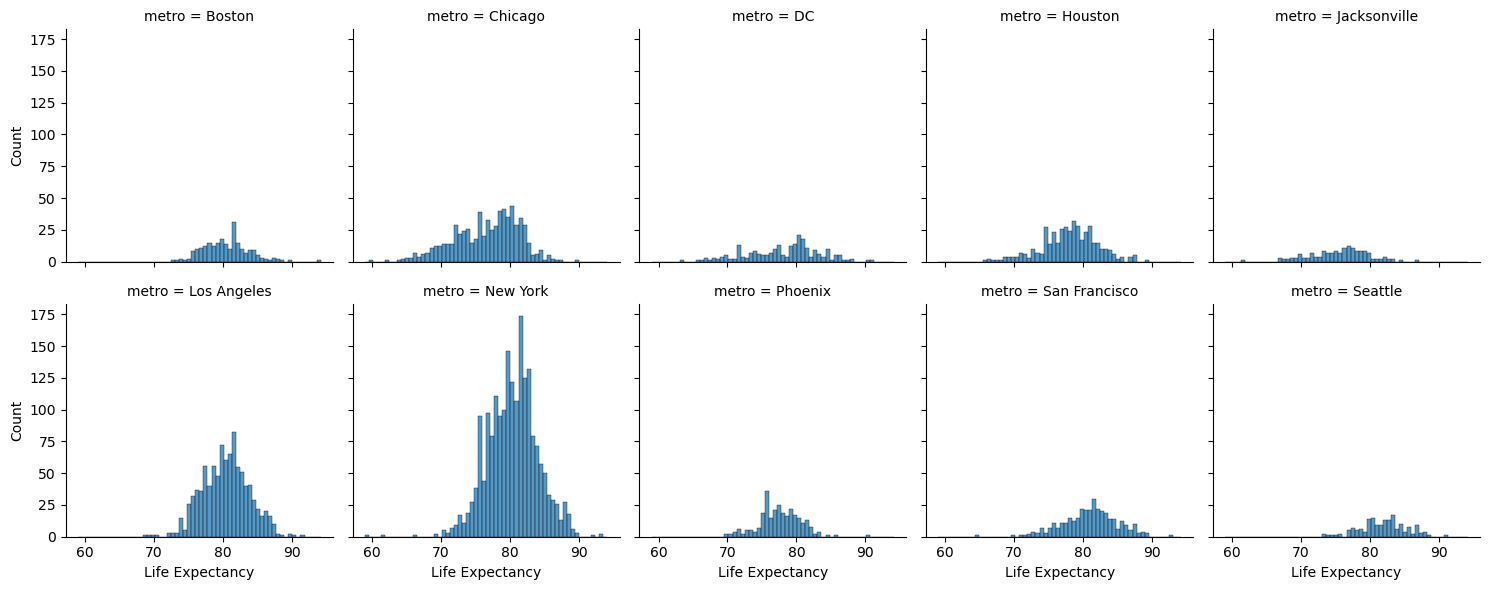

In [ ]:
sns.displot(
    data, x="Life Expectancy",
    col= 'metro', col_wrap = 5, height = 3)

<Axes: xlabel='Life Expectancy', ylabel='metro'>

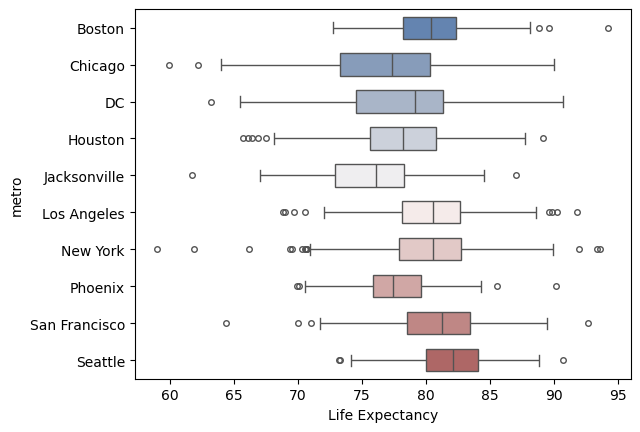

In [102]:
sns.boxplot(
    data, y="metro", x="Life Expectancy", hue = "metro",
    width = .6, palette="vlag",
    flierprops = {'markersize': 4}
)

The average life expectancy by state in the US in 2021 ranges from 70.9 (Mississsippi) to 79.9 (Hawaii) (https://www.cdc.gov/nchs/data/nvsr/nvsr73/nvsr73-07.pdf). The national average is 77.5 years. We can see that the life expectancy we have for the metro areas are higher than their correspinding state averages.

There is no explict cut off values to define poor or good life expectancy, but generally a mean life expectancy below 70 years is often considered poor. the following categorization is applied:
- < 70: Poor
- [70, 75): Fair
- [75, 80): Average
- [80, 85): Good
- >= 85: Excellent


In [202]:
data['Life Expectancy level'] = pd.cut(data['Life Expectancy'], 
                                       bins = [0, 70, 75, 80, 85, 100], 
                                       labels = ['poor', 'Fair', 'Average', 'Good', 'Excellent'])


In [121]:
ten_metro = pd.Categorical(['Seattle', 'New York', 'Boston', 'Chicago', "DC", "Los Angeles", "San Francisco", "Phoenix", "Houston", "Jacksonville"])

urban_indicators = ['Average Distance to Transit', 'Ave Economic Diversity', 
                    'Ave Road Network Density', 'Walkability Index',
                    'Ave Percent People Without Health Insurance', 'Ave Population Density',
                    'Ave Percent People Unemployed', 'Ave Physical Inactivity']

mean_life_exp_by_metro = data.groupby('metro')['Life Expectancy'].mean()

def get_metrics(city):
    if city not in ten_metro:
        raise ValueError("Not in the ten metro areas. ")
    else:
        life_exp_mean = mean_life_exp_by_metro.loc[city].round(2)
        
        data_subset = data[data['metro'] == city]
        lowest_tracts = data_subset.nsmallest(5, 'Life Expectancy').loc[:, ["FGEOIDCT10", "Life Expectancy"]]
        urban_index_means = data_subset.loc[:, urban_indicators].mean()
    
    print(f'The mean life expectancy across all census tracts in {city} is {life_exp_mean}')
    print(lowest_tracts)
    print(urban_index_means)
    

/var/folders/l9/36rxbxjd24d4vntv3lx078s40000gn/T/ipykernel_10961/2367156404.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_life_exp_by_metro = data.groupby('metro')['Life Expectancy'].mean()


In [ ]:
get_metrics("Seattle")

In [149]:
## data transformation for percentiles

for indicator in urban_indicators:
    non_na_values = len(data[indicator].dropna())
    col_name = indicator + "_Rank"
    data[col_name] = data[indicator].rank(na_option = 'keep')/non_na_values *100

In [207]:
data
mean_life_exp_by_metro

,FGEOIDCT10,Sits in State,Life Expectancy,Average Distance to Transit,Ave Economic Diversity,Ave Road Network Density,Walkability Index,Ave Percent People Without Health Insurance,Ave Population Density,Ave Percent People Unemployed,...,metro,Average Distance to Transit_Rank,Ave Economic Diversity_Rank,Ave Road Network Density_Rank,Walkability Index_Rank,Ave Percent People Without Health Insurance_Rank,Ave Population Density_Rank,Ave Percent People Unemployed_Rank,Ave Physical Inactivity_Rank,Life Expectancy level
0,4013082002,AZ,NaN,859.68,0.51,19.62,11.11,13.82,6200.78,0.71,...,Phoenix,98.301630,39.806388,11.707761,8.571901,79.905517,18.658940,1.950025,63.194796,NaN
1,4013082007,AZ,75.9,482.30,0.00,21.02,10.66,15.08,7689.22,11.16,...,Phoenix,85.105299,0.496442,15.679298,6.710243,82.351949,23.841060,82.601722,72.486907,Average
2,4013082008,AZ,75.9,530.64,0.29,25.31,12.78,26.79,11592.29,4.91,...,Phoenix,88.807745,8.952507,33.882178,23.382426,95.225240,35.529801,37.371265,63.836797,Average
3,4013082009,AZ,75.9,535.93,0.32,24.55,13.44,19.81,10130.09,4.54,...,Phoenix,89.147418,11.194771,29.654145,33.336091,90.020246,31.241722,33.530306,67.055246,Average
4,4013082010,AZ,NaN,500.72,0.27,25.49,13.33,12.76,11009.58,7.73,...,Phoenix,86.616848,7.678305,34.833692,31.366871,76.902311,33.824503,63.658619,63.194796,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039,53033025003,WA,86.9,846.25,0.60,14.79,7.77,1.52,2862.38,2.87,...,Seattle,98.097826,61.368526,3.996359,2.267086,10.106293,6.788079,16.748269,5.203582,Excellent
6040,53033032309,WA,80.4,430.33,0.83,22.72,16.79,4.98,6550.70,2.08,...,Seattle,80.197011,99.271885,21.644878,90.542777,38.797031,19.933775,9.581293,0.920764,Good
6041,53033032323,WA,84.3,500.23,0.42,18.43,12.07,2.51,5416.27,3.44,...,Seattle,86.531929,23.374152,9.167632,15.141486,17.825207,15.728477,21.965220,3.531002,Good
6042,53033032324,WA,87.7,390.26,0.58,17.05,12.77,8.66,8334.13,8.18,...,Seattle,75.645380,56.387556,6.652325,23.250041,60.612451,25.860927,66.807361,5.380977,Excellent


metro
Boston           80.498276
Chicago          76.661684
DC               78.091286
Houston          78.015728
Jacksonville     75.513836
Los Angeles      80.427789
New York         80.412859
Phoenix          77.586572
San Francisco    80.947126
Seattle          81.970930
Name: Life Expectancy, dtype: float64

In [212]:
# All of the functions below takes in a city (category), and the processed data as input

def get_city_ind_avg(city, df):
    '''
    This function returns two pandas Series objects.
    0 - a series that contains the mean values for the 8 urban indices for a selected city.
    1 - a series that contains the mean percentile ranks for the 8 urban indices for a selected city. 
    The indices should be in the same order. 
    
    usage:
    index_values, index_ranks = get_city_ind_avg()
    '''
    if city not in ten_metro:
        raise ValueError("Not in the ten metro areas. ")
    else:
        data_subset = df[df['metro'] == city]
        urban_index_means = data_subset.loc[:,'Average Distance to Transit':'Ave Physical Inactivity'].mean()
        urban_index_rank_means = data_subset.loc[:,'Average Distance to Transit_Rank':'Ave Physical Inactivity_Rank'].mean()

        # check if the two series have the same order of urban indices
        check = urban_index_means.index == urban_index_rank_means.index.astype(str).str[:-5] 
        
        if check.all():
            pass
        else:
            raise ValueError("The order of indices do not match. ")

    return (urban_index_means, urban_index_rank_means)

def get_city_life_exp(city, df):
    '''
    This function returns a set of metrics around the life expectancy of a selected city.
    0 - the mean life expectancy of a metro area across all census tracts,
    1 - the level (poor, fair, ave, good, excellent) of the mean life expectancy,
    2 - a data frame with 5 census tracts with the lowest life expectancy.
    '''
    if city not in ten_metro:
        raise ValueError("Not in the ten metro areas. ")
    else:
        data_subset = df[df['metro'] == city]
        life_exp_mean = mean_life_exp_by_metro.loc[city].round(2)
        
        life_exp_level = (
            "Poor" if life_exp_mean < 70 else
            "Fair" if 70 <= life_exp_mean < 75 else
            "Average" if 75 <= life_exp_mean < 80 else
            "Good" if 80 <= life_exp_mean < 85 else
            "Excellent"
        )
        
        lowest_tracts = data_subset.nsmallest(5, 'Life Expectancy').loc[:, ["FGEOIDCT10", "Life Expectancy", "Life Expectancy level"]]
    
    return (life_exp_mean, life_exp_level, lowest_tracts)

def get_city_life_exp_dist(city, df):
    if city not in ten_metro:
        raise ValueError("Not in the ten metro areas. ")
    else:
        data_subset = df[df['metro'] == city]
        p = sns.histplot(data_subset, x= 'Life Expectancy', kde = True)
    
    return p


In [194]:
data_subset = data[data['metro'] == 'Seattle']
urban_index_means = data_subset.loc[:,'Average Distance to Transit':'Ave Physical Inactivity'].mean()
urban_index_rank_means = data_subset.loc[:,'Average Distance to Transit_Rank':'Ave Physical Inactivity_Rank'].mean()

#merged = pd.concat([urban_index_means, urban_index_rank_means], axis= 1)
#merged.columns = ["Urban Index", "Value", "Urban Index_Rank", "Percentile Rank"]

urban_index_rank_means.index.astype(str).str[:-5]
urban_index_means.index == urban_index_rank_means.index.astype(str).str[:-5]

#if check.all(): 
#    merged.set_index('Urban Index') 

#merged['Urban Index_Rank'].str.slice(stop = -5)

Index(['Average Distance to Transit', 'Ave Economic Diversity',
       'Ave Road Network Density', 'Walkability Index',
       'Ave Percent People Without Health Insurance', 'Ave Population Density',
       'Ave Percent People Unemployed', 'Ave Physical Inactivity'],
      dtype='object')

array([ True,  True,  True,  True,  True,  True,  True,  True])

(Average Distance to Transit                      345.527790
 Ave Economic Diversity                             0.595574
 Ave Road Network Density                          27.241585
 Walkability Index                                 14.964918
 Ave Percent People Without Health Insurance        4.315440
 Ave Population Density                         11580.543571
 Ave Percent People Unemployed                      4.211264
 Ave Physical Inactivity                           12.353791
 dtype: float64,
 Average Distance to Transit_Rank                    56.519534
 Ave Economic Diversity_Rank                         60.625128
 Ave Road Network Density_Rank                       44.722747
 Walkability Index_Rank                              61.556296
 Ave Percent People Without Health Insurance_Rank    31.007987
 Ave Population Density_Rank                         30.106160
 Ave Percent People Unemployed_Rank                  29.608223
 Ave Physical Inactivity_Rank                         

(81.97,
 'Good',
        FGEOIDCT10  Life Expectancy Life Expectancy level
 5940  53033007700             73.2                  Fair
 5982  53033011200             73.3                  Fair
 5979  53033011002             74.1                  Fair
 5951  53033008700             74.6                  Fair
 5910  53033004900             75.2               Average)

(75.51,
 'Average',
        FGEOIDCT10  Life Expectancy Life Expectancy level
 1921  12031001600             61.7                  poor
 1956  12031011500             67.0                  poor
 1935  12031002902             67.1                  poor
 1920  12031001500             67.2                  poor
 1919  12031001400             67.3                  poor)

<Axes: xlabel='Life Expectancy', ylabel='Count'>

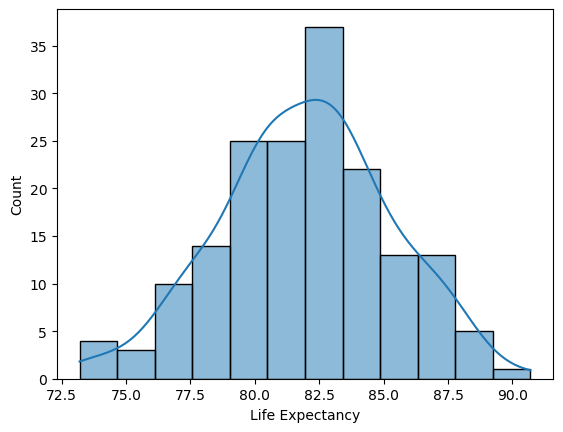

In [213]:
get_city_ind_avg('Seattle', data)

get_city_life_exp('Seattle', data)
get_city_life_exp('Jacksonville', data)

get_city_life_exp_dist('Seattle', data)